In [5]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import pickle
import numpy as np

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.dm_params import DMParams

sys.path.append(os.environ['DH_DIR'])
from darkhistory.main import evolve

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"matplotlibrc")

In [6]:
# phph
dm_params = DMParams(
    mode = 'decay',
    primary = 'phot_delta',
    m_DM = 1e8, # [eV]
    lifetime = 1e25, #[s]
)

In [7]:
run_name = 'phph_decay_1e8_1e25_nospecies'

soln = evolve(
    DM_process=dm_params.mode, mDM=dm_params.m_DM,
    primary=dm_params.primary,
    sigmav=dm_params.sigmav, lifetime=dm_params.lifetime,
    struct_boost=dm_params.struct_boost,
    start_rs=3000, end_rs=5, coarsen_factor=12, verbose=1,
    # use fake reionization to get case-A recomb. coeff.
    # reion_switch=True, reion_rs=47.,
    # photoion_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    # photoheat_rate_func=[lambda x: 0., lambda x: 0., lambda x: 0.],
    # cross_check_21cmfast=True,
    # cross_check_21cmfast_tf_version=tf_version,
    # debug_inject_ST_xray=False,
)

pickle.dump(soln, open(f"{run_name}_soln.p", 'wb'))

  0%|          | 0/534 [00:00<?, ?it/s]

100%|██████████| 534/534 [01:15<00:00,  7.10it/s]


In [8]:
solns = [
    pickle.load(open(f"phph_decay_1e8_1e25_nospecies_soln.p", 'rb')),
    pickle.load(open(f"phph_decay_1e8_1e25_species_soln.p", 'rb')),
]

[]

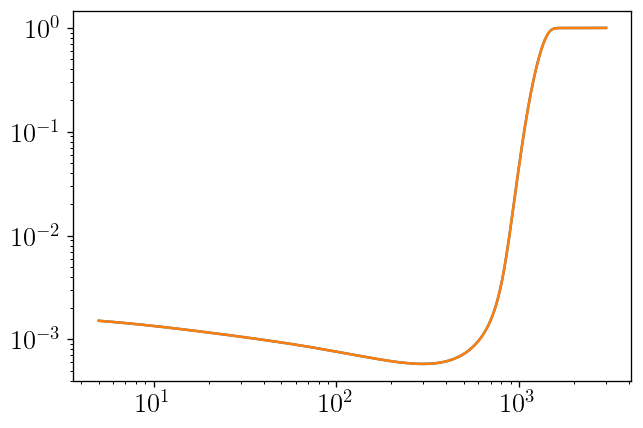

In [10]:
plt.plot(solns[0]['rs'], solns[0]['x'][:,0], label='nospecies')
plt.plot(solns[1]['rs'], solns[1]['x'][:,0], label='species')
plt.loglog()

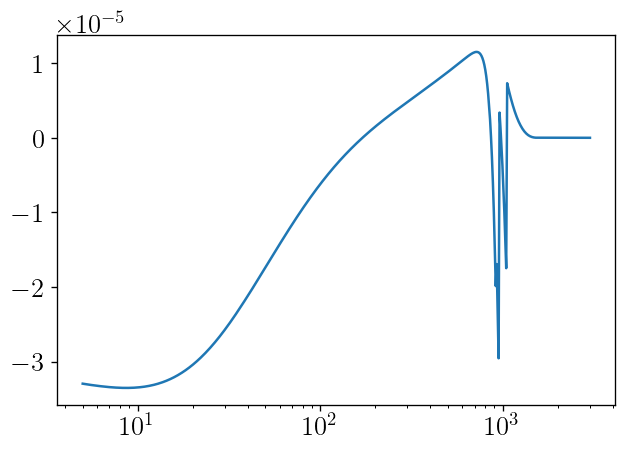

In [15]:
plt.plot(solns[1]['rs'], (solns[1]['x'][:,0] - solns[0]['x'][:,0])/solns[0]['x'][:,0], label='species')
plt.xscale('log')